### Import Relevant libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from mrmr import mrmr_regression
from sklearn.preprocessing import MinMaxScaler






### Data Analysis and Features selection

In [2]:
patient_78 = pd.read_csv('Patient 78_data.csv')

In [3]:
patient_78.describe()

,hm_mode0,hm_mode1,hm_mode2,hm_mode3,hm_mode4,hc_mode0,hc_mode1,hc_mode2,hc_mode3,hc_mode4,...,Disp_mode1,Disp_mode2,Disp_mode3,Disp_mode4,dispm_mode0,dispm_mode1,dispm_mode2,dispm_mode3,dispm_mode4,BIS
count,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,...,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000,4065.000000
mean,0.053848,0.296058,0.590308,1.420438,1.713623,9.202099,1.449843,1.084558,1.013320,1.026966,...,1.889030,1.828502,2.037795,1.773090,0.944658,1.673464,2.027975,1.971057,1.953518,58.210824
std,0.040411,0.021806,0.037230,0.025401,0.056731,4.822674,0.229829,0.037764,0.004515,0.019197,...,0.035722,0.026029,0.060343,0.072977,0.137026,0.037175,0.021364,0.004477,0.013298,18.259276
min,0.008073,0.214878,0.534832,1.389939,1.624593,2.737199,1.123191,1.045555,0.985592,1.000771,...,0.169293,0.753269,0.939290,1.619029,0.045092,0.149074,0.942114,1.929983,1.886927,32.300000
25%,0.033435,0.291291,0.563640,1.398699,1.662768,6.356065,1.311234,1.059034,1.008601,1.004223,...,1.881335,1.816445,2.043866,1.713341,0.895103,1.665321,2.019252,1.967913,1.943947,44.500000
50%,0.039296,0.294827,0.575792,1.405196,1.689667,8.431852,1.344486,1.063799,1.015990,1.034855,...,1.890467,1.829271,2.067976,1.798591,0.926755,1.676114,2.025989,1.970484,1.949577,50.600000
75%,0.047852,0.300745,0.607807,1.445125,1.779207,9.450613,1.465787,1.123899,1.017027,1.044490,...,1.899456,1.840426,2.071719,1.825185,0.964004,1.685020,2.037632,1.974093,1.962497,71.000000
max,0.159646,0.387846,0.706263,1.473749,1.829885,41.216318,2.256005,1.180954,1.019153,1.057956,...,1.929142,1.906910,2.077932,1.898356,1.253316,1.765413,2.056787,1.984365,1.990124,97.300000


In [4]:
Train=patient_78

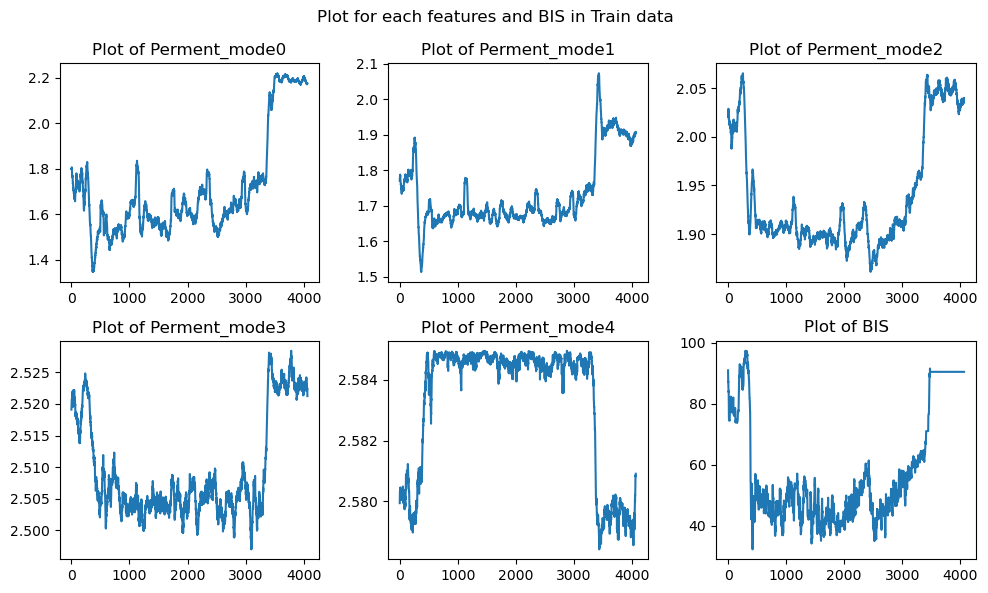

In [5]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(10, 6))

plt.suptitle('Plot for each features and BIS in Train data')


# Plot on the first subplot
axes[0, 0].plot(Train['Perment_mode0'])
axes[0, 0].set_title('Plot of Perment_mode0')

# Plot on the second subplot
axes[0, 1].plot(Train['Perment_mode1'])
axes[0, 1].set_title('Plot of Perment_mode1')

# Plot on the third subplot
axes[0, 2].plot(Train['Perment_mode2'])
axes[0, 2].set_title('Plot of Perment_mode2')

axes[1, 0].plot(Train['Perment_mode3'])
axes[1, 0].set_title('Plot of Perment_mode3')

axes[1, 1].plot(Train['Perment_mode4'])
axes[1, 1].set_title('Plot of Perment_mode4')

axes[1, 2].plot(Train['BIS'])
axes[1, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

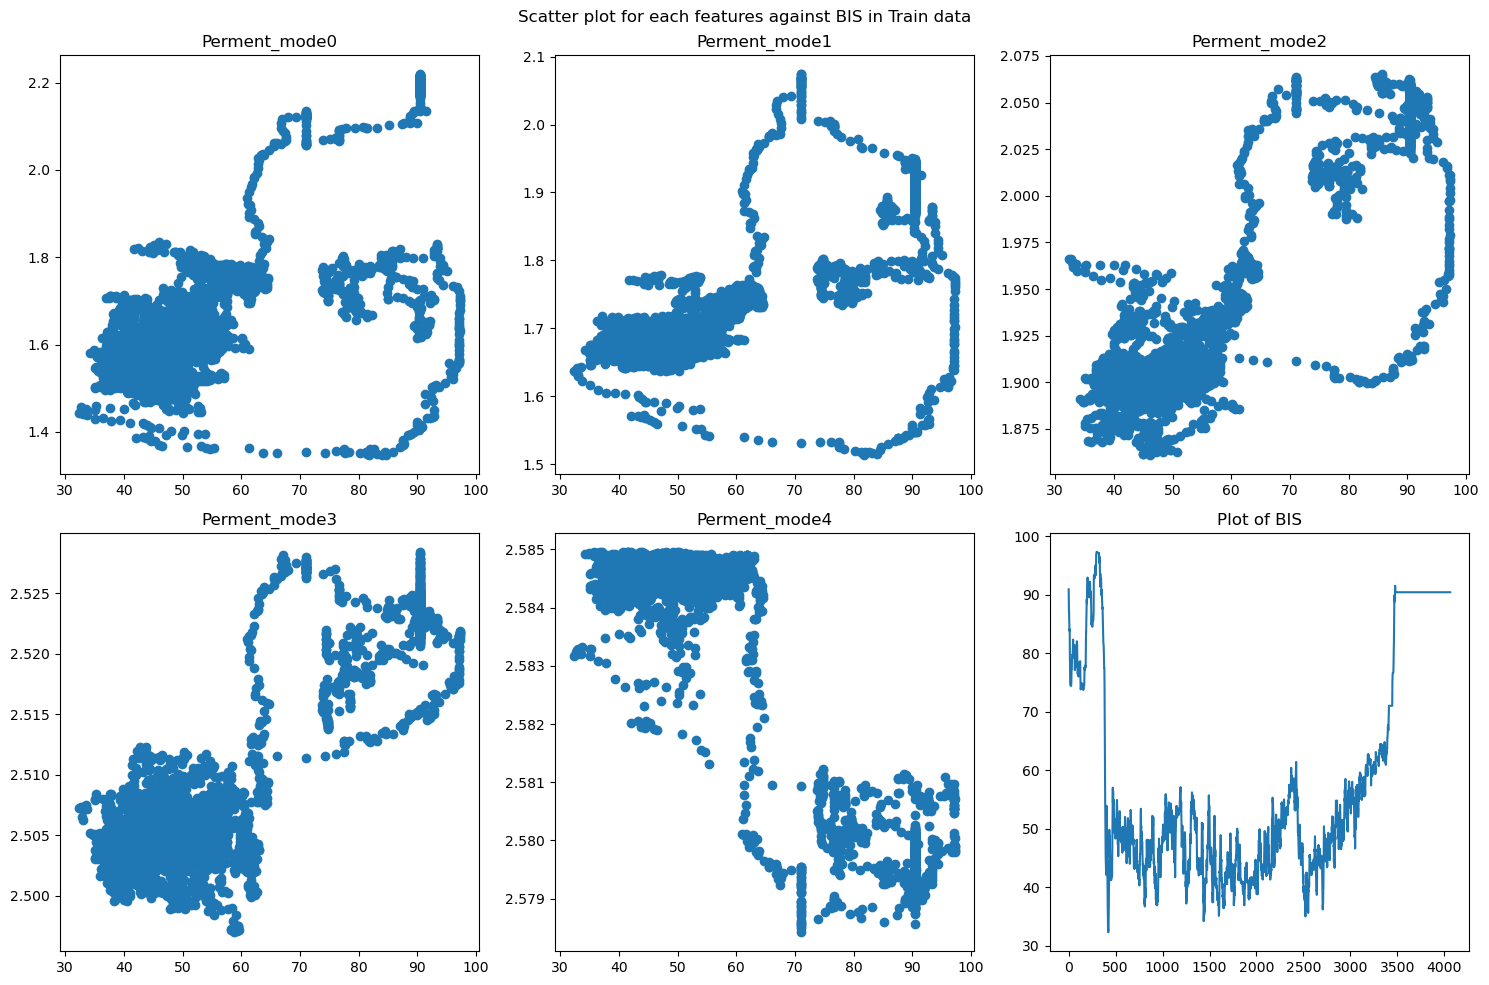

In [8]:
# Create a figure and subplots
fig, axes = plt.subplots(nrows=2,ncols=3, figsize=(15, 10))

plt.suptitle('Scatter plot for each features against BIS in Train data')

# Plot on the first subplot
axes[0, 0].scatter(Train['BIS'],Train['Perment_mode0'])
axes[0, 0].set_title('Perment_mode0')

# Plot on the second subplot
axes[0, 1].scatter(Train['BIS'],Train['Perment_mode1'])
axes[0, 1].set_title('Perment_mode1')

# Plot on the third subplot
axes[0, 2].scatter(Train['BIS'], Train['Perment_mode2'])
axes[0, 2].set_title('Perment_mode2')

axes[1, 0].scatter(Train['BIS'],Train['Perment_mode3'])
axes[1, 0].set_title('Perment_mode3')

axes[1, 1].scatter(Train['BIS'], Train['Perment_mode4'])
axes[1, 1].set_title('Perment_mode4')

axes[1, 2].plot(Train['BIS'])
axes[1, 2].set_title('Plot of BIS')


# Adjust spacing between subplots
fig.tight_layout()



# Display the figure
plt.show()

In [4]:
X=patient_78.drop('BIS', axis=1)
y= patient_78['BIS']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Linear regression

In [5]:
metrics = {}
def plot_regression(data, column):
    
    global metrics
    
    X = data[column].values.reshape(-1, 1)
    #X = X[:, np.newaxis]
    y = data['BIS']
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)
    
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # Perform regression
    reg = LinearRegression(n_jobs=-1).fit(X_train_scaled, y_train)
    
    # Predictions
    y_predicted = reg.predict(X_test_scaled)
    
    # Show the score and r2
    #mse = mean_squared_error(y, y_predicted)
    r2 = r2_score(y_test, y_predicted)
    
    # keep track of metrics
    
    #metrics["{}_mse".format(column)] = mse
    metrics["{}_r2".format(column)] = r2
    
    
    
    # Plot the graph#
    plt.figure(figsize=(8,6))
    plt.scatter(data[column], data['BIS'], label="data", c="blue")
    plt.plot(X_test, y_predicted, label="Regression", c="red")
    plt.xlabel(column)
    plt.ylabel('BIS')
    plt.legend(loc="upper left")
    plt.show()

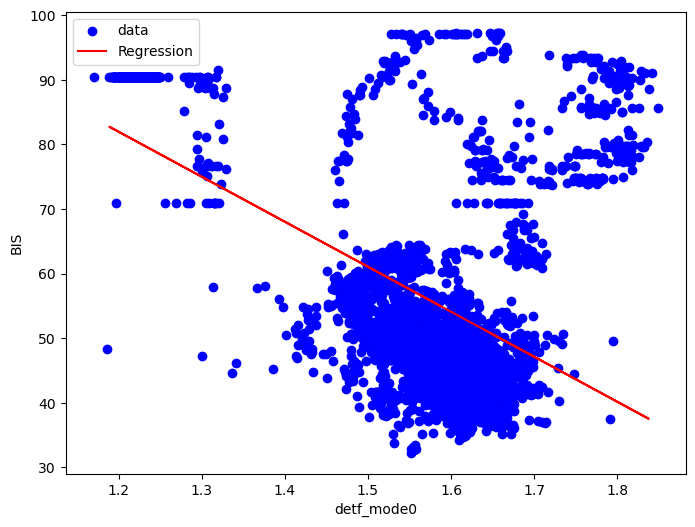

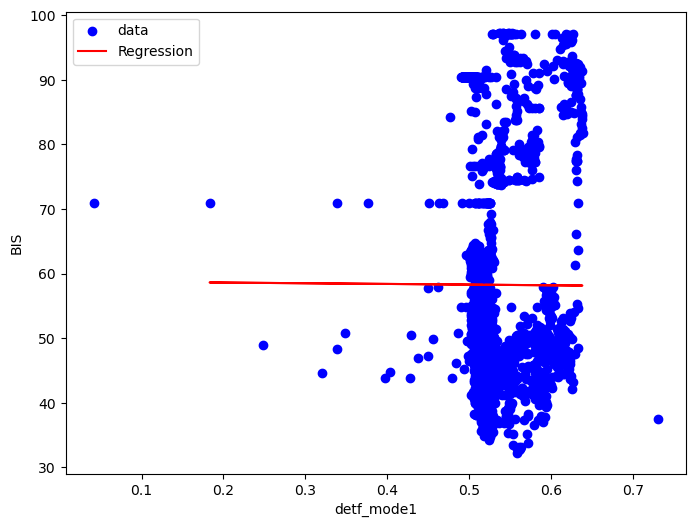

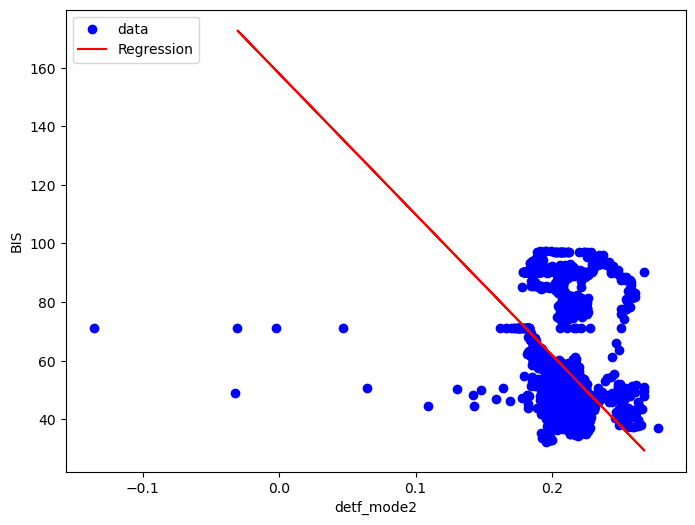

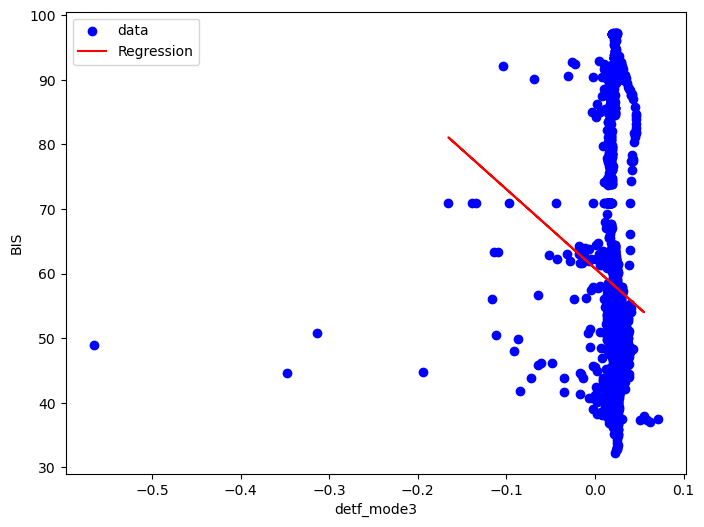

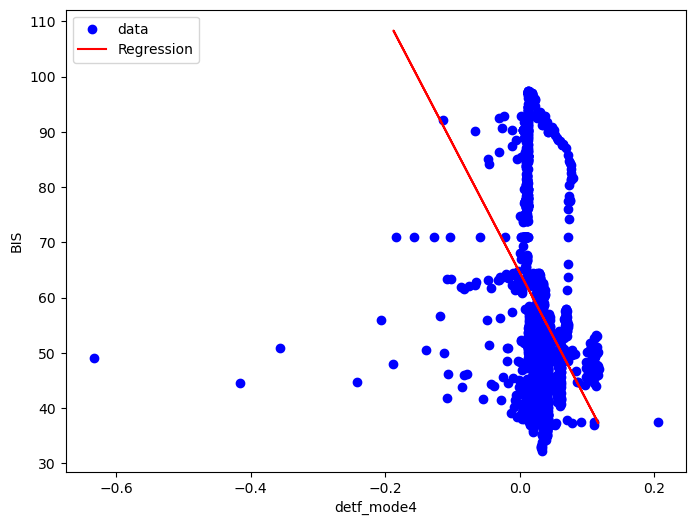

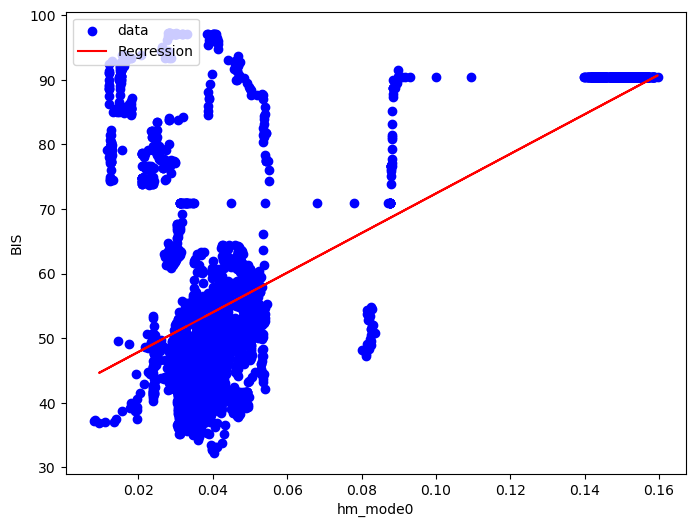

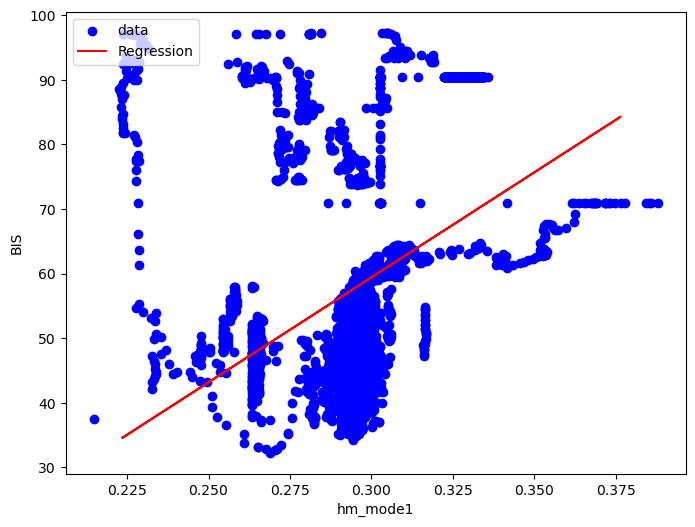

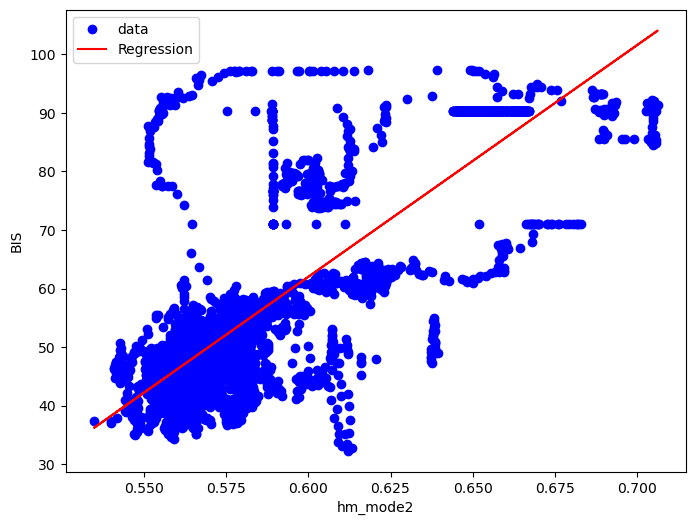

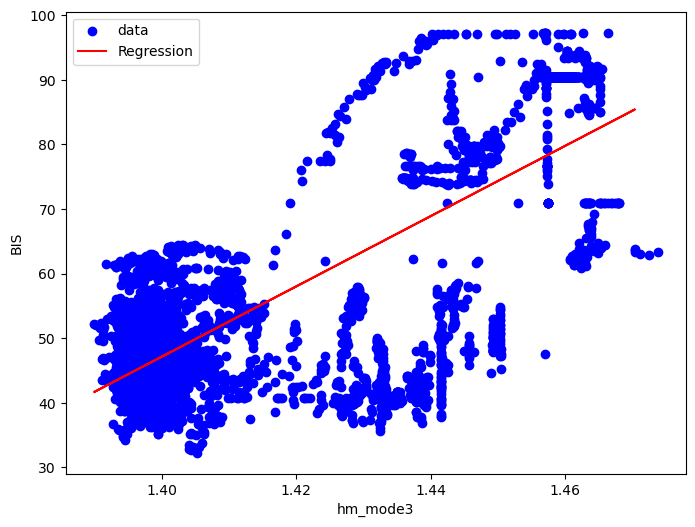

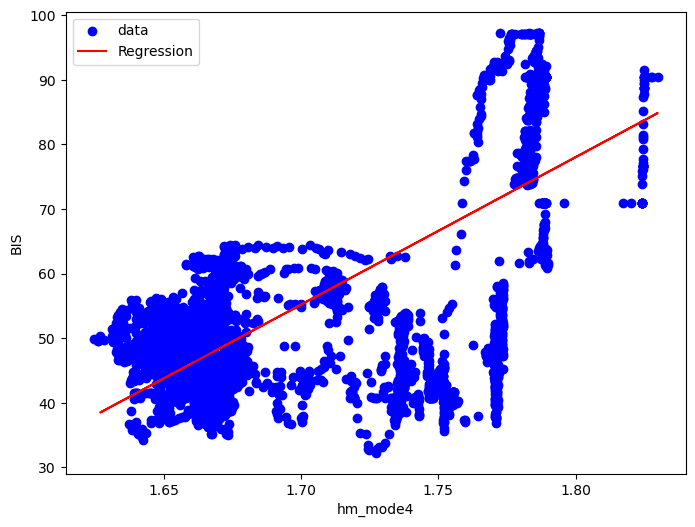

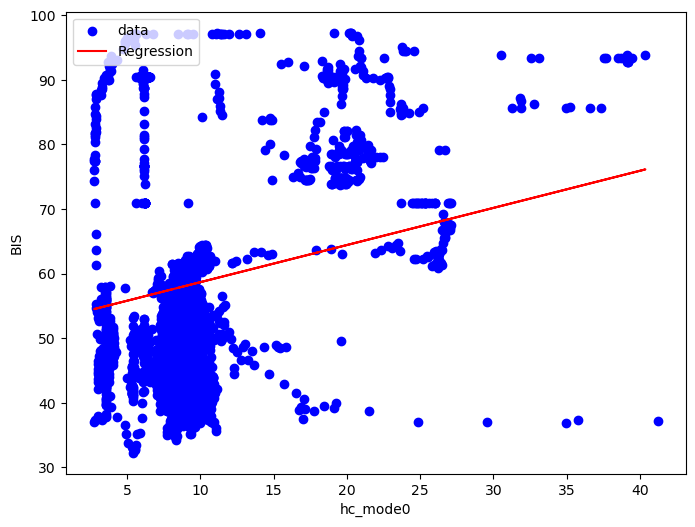

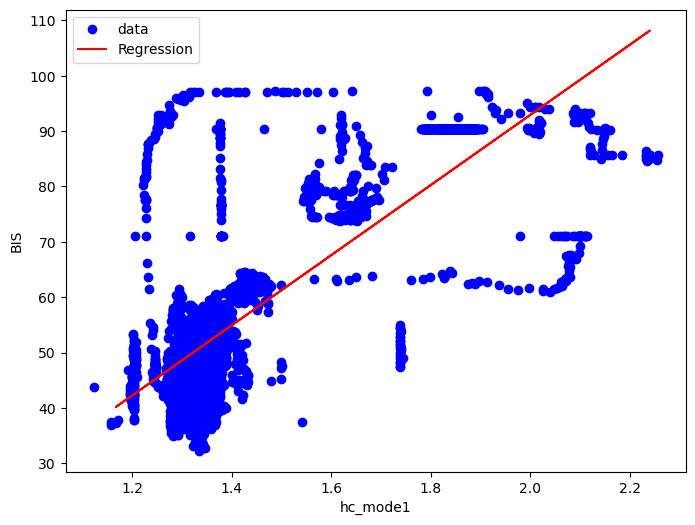

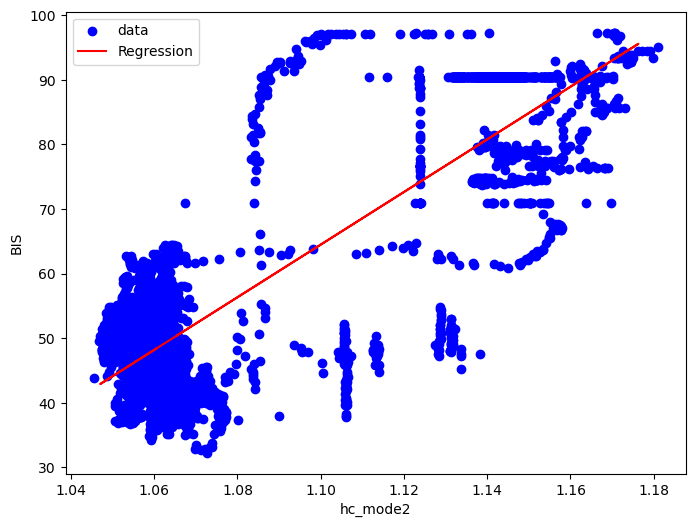

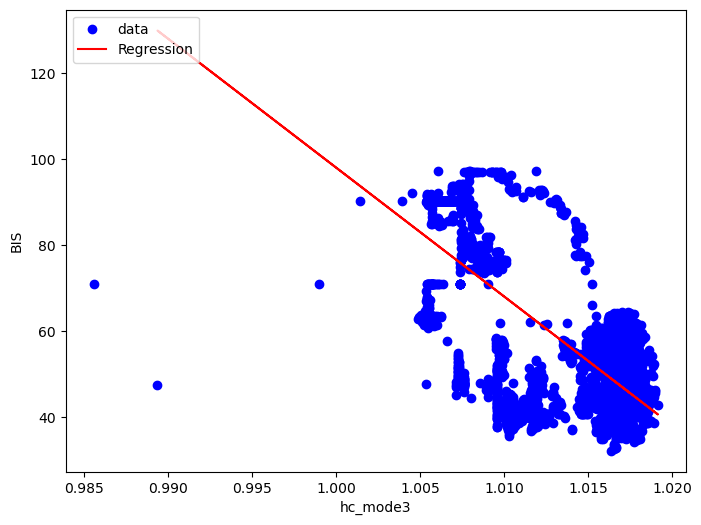

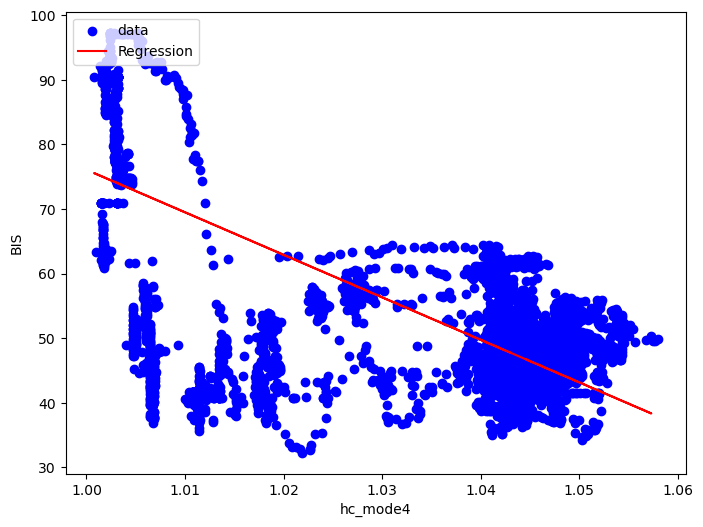

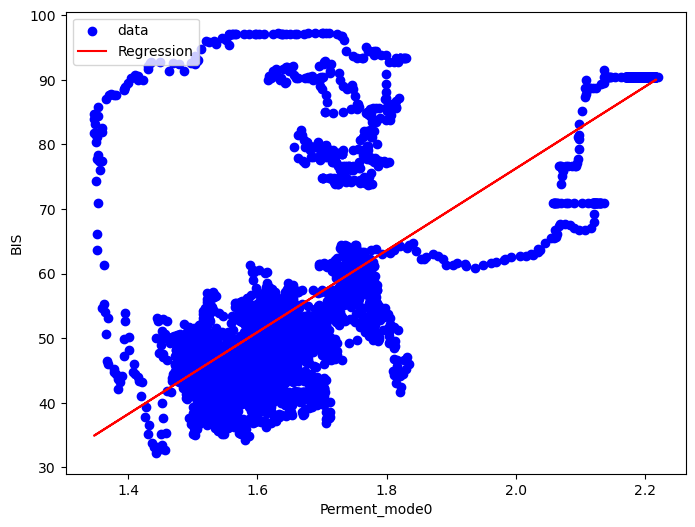

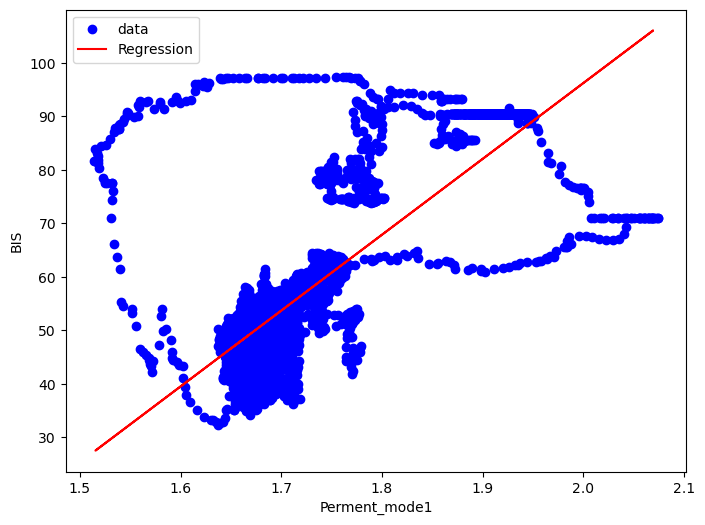

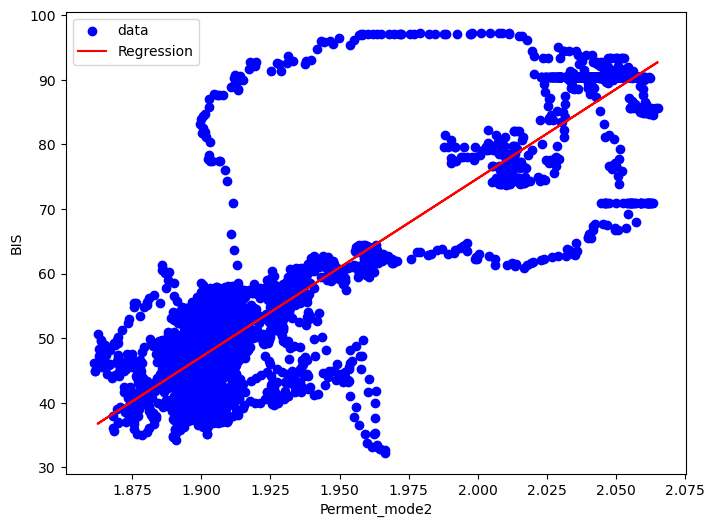

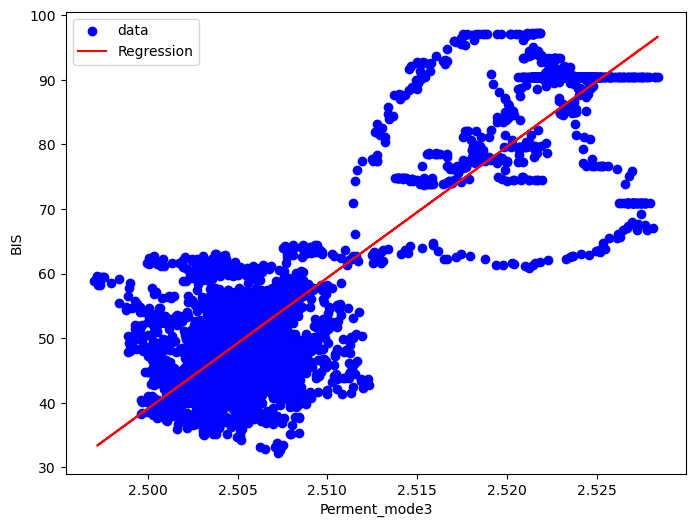

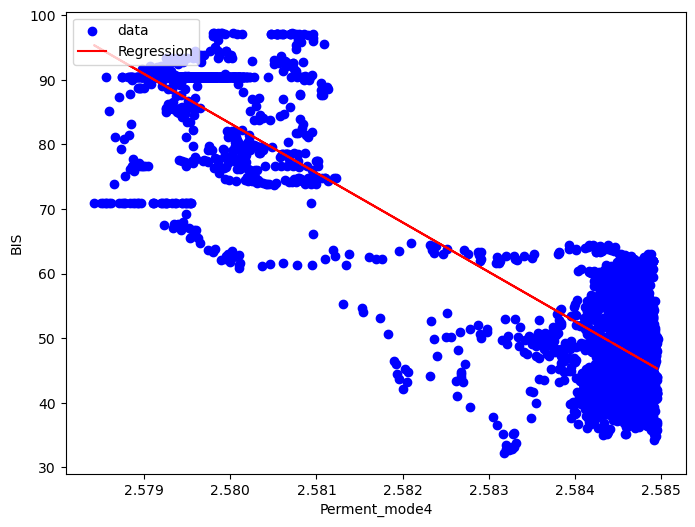

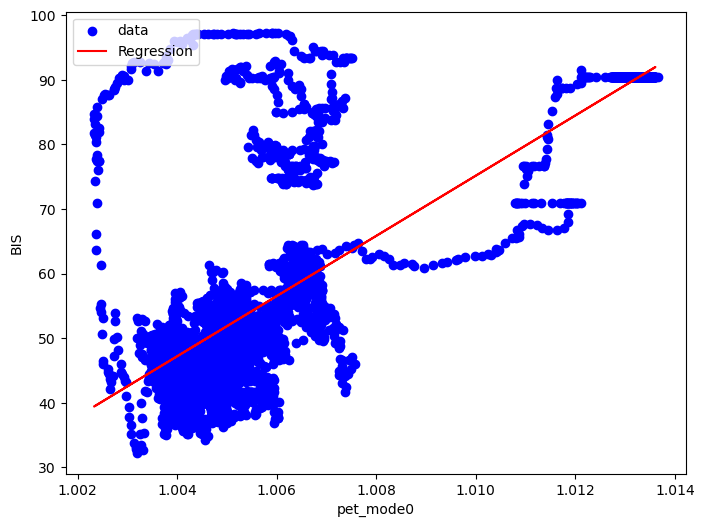

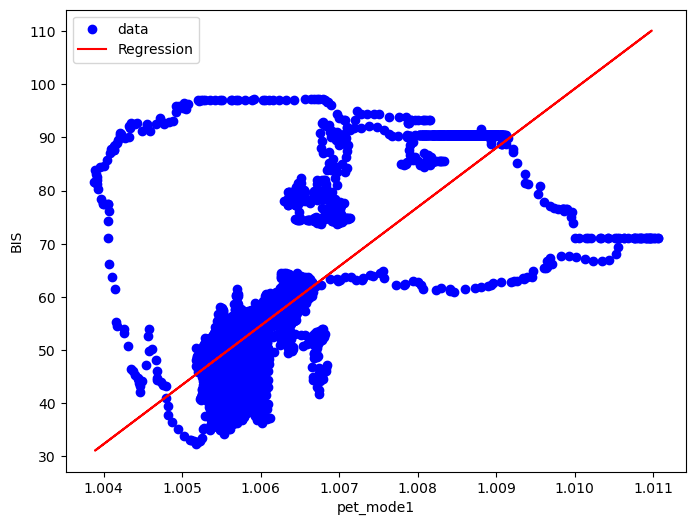

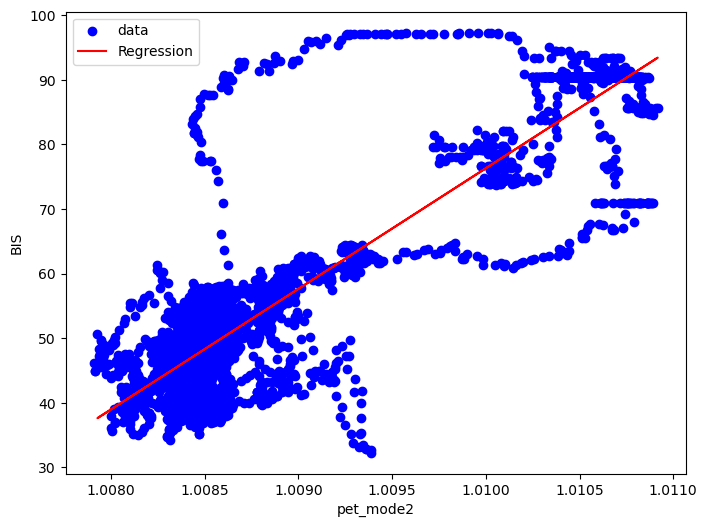

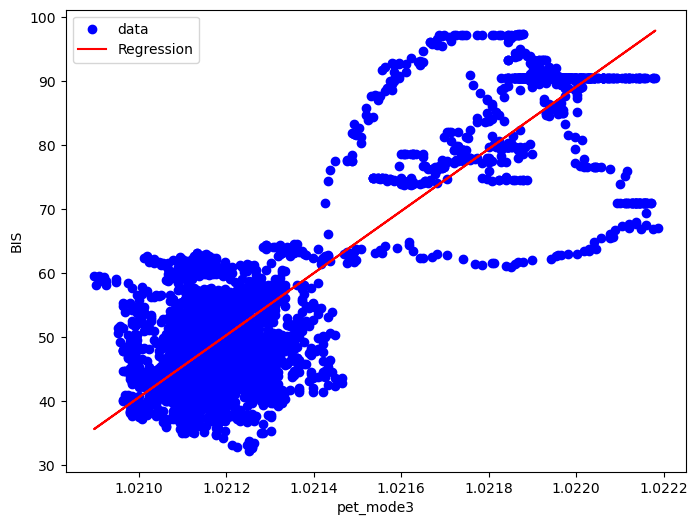

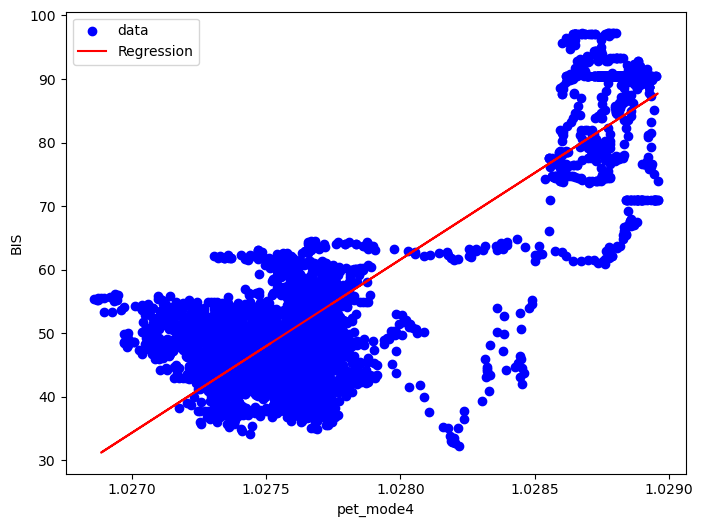

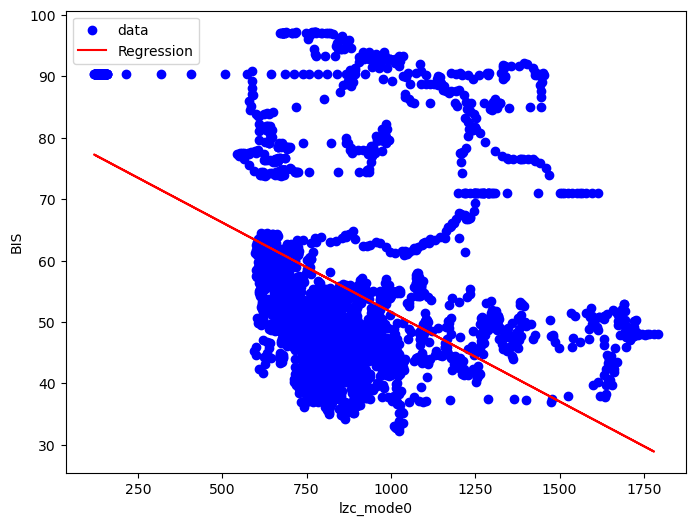

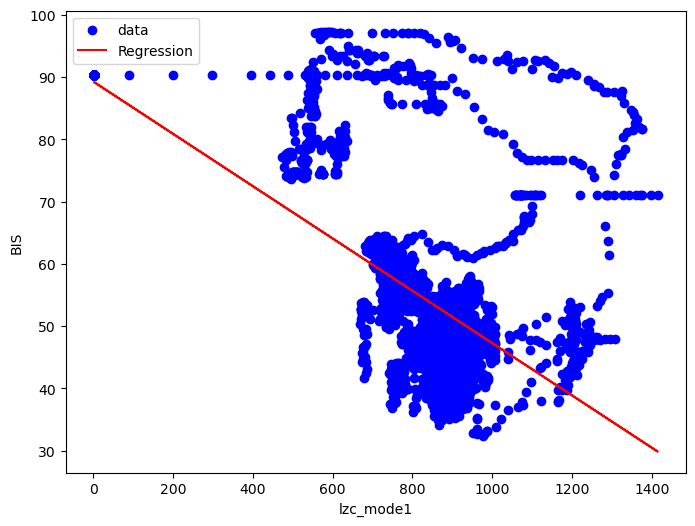

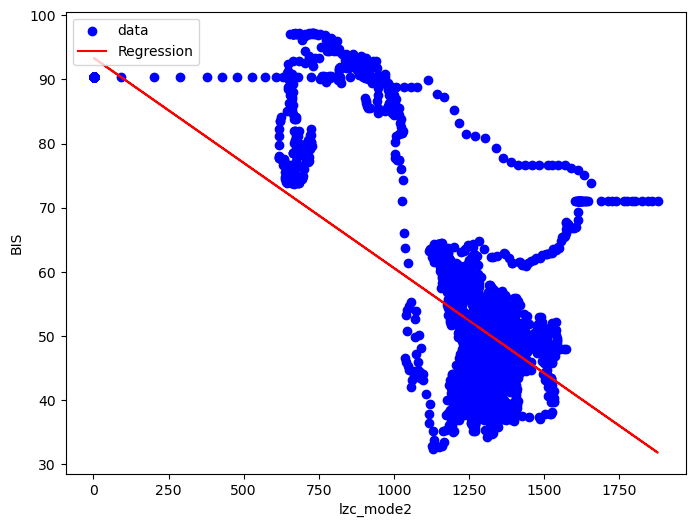

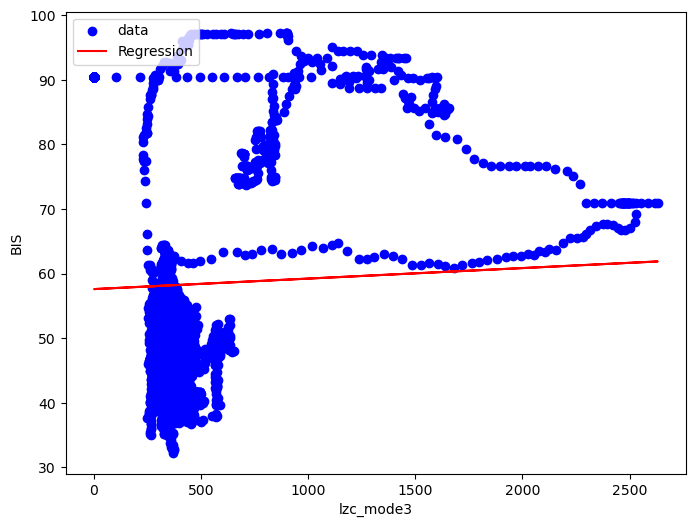

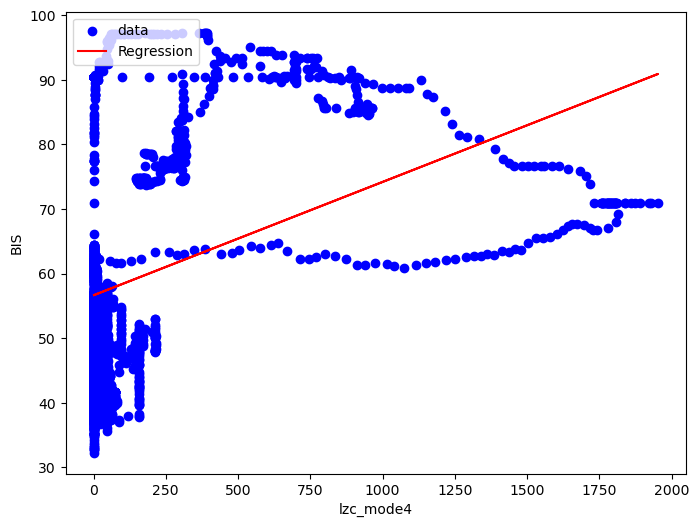

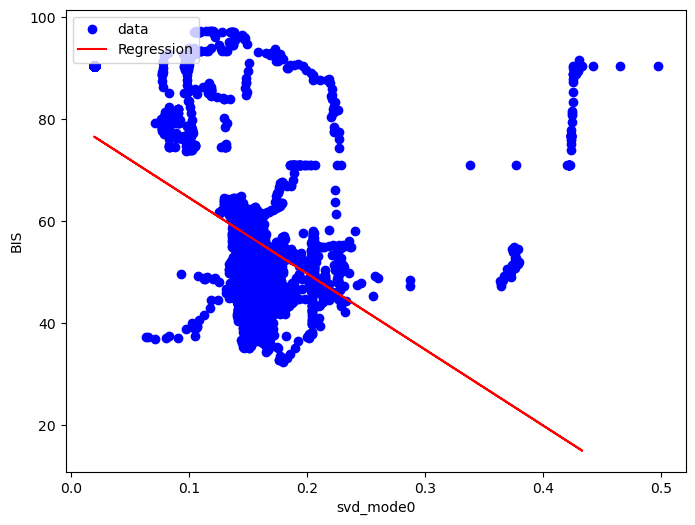

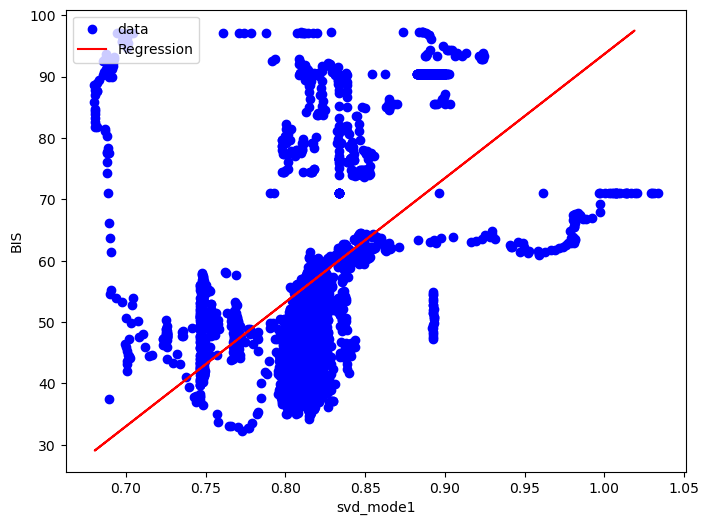

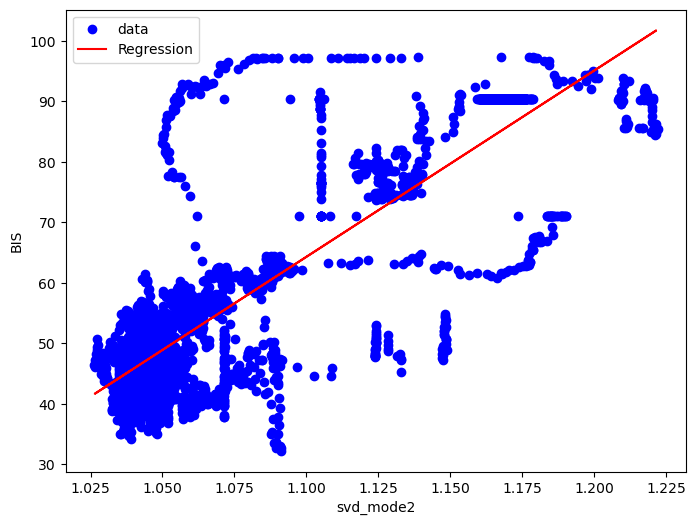

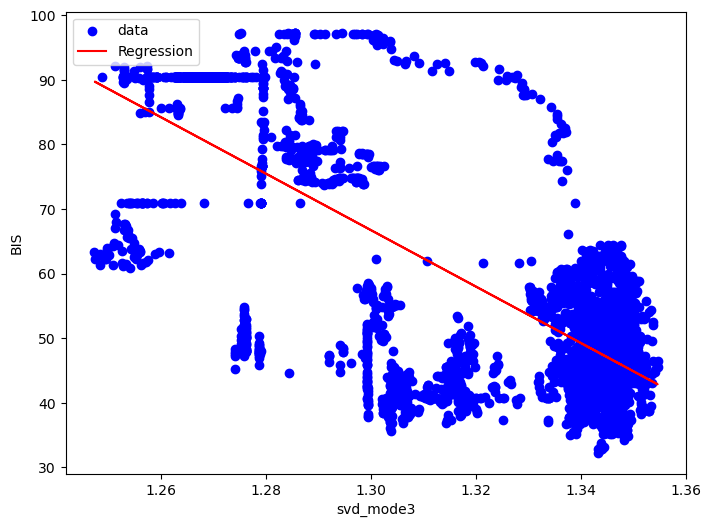

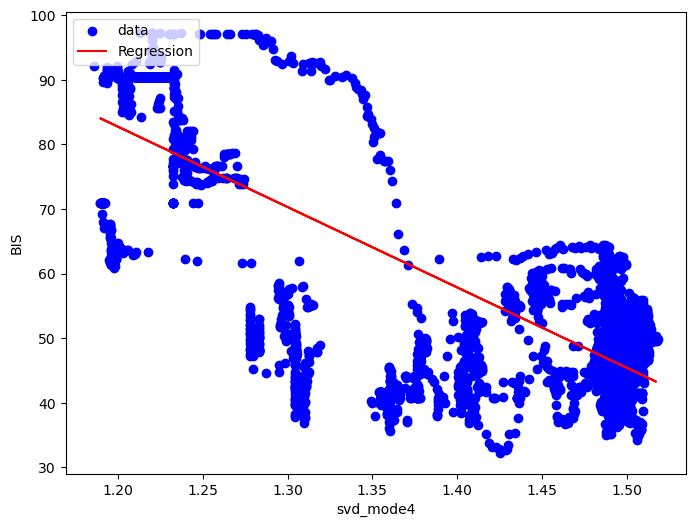

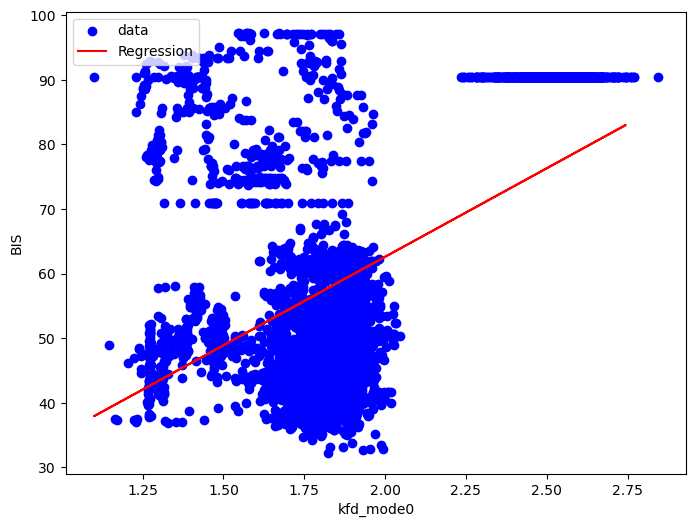

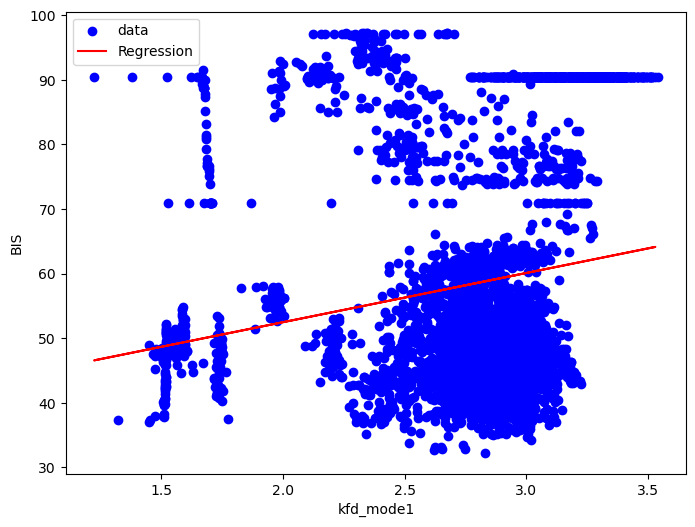

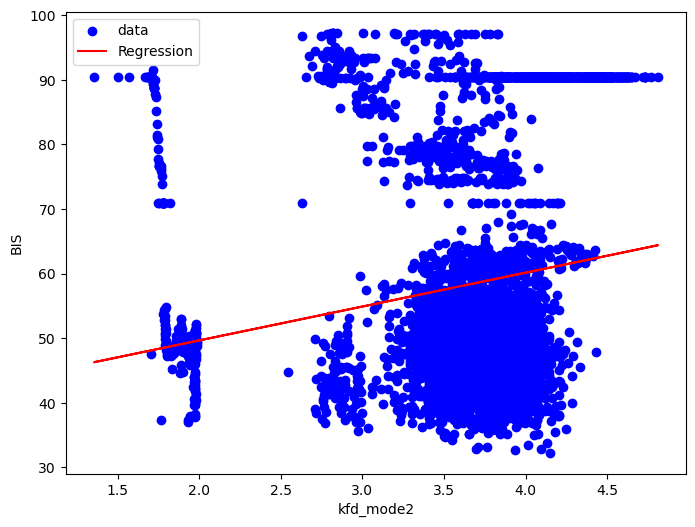

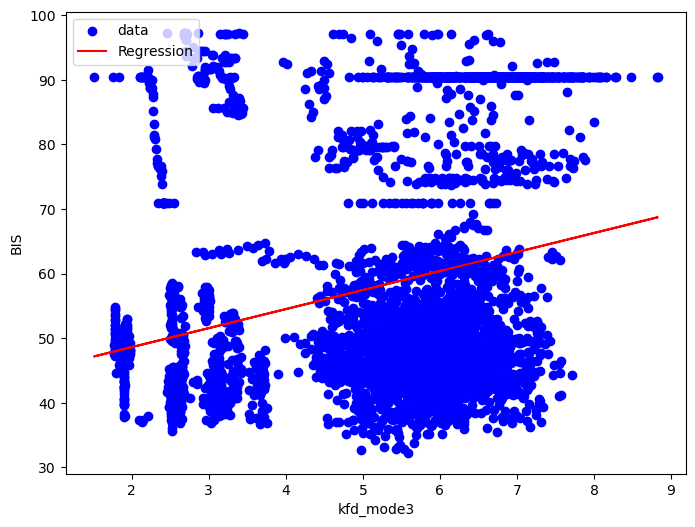

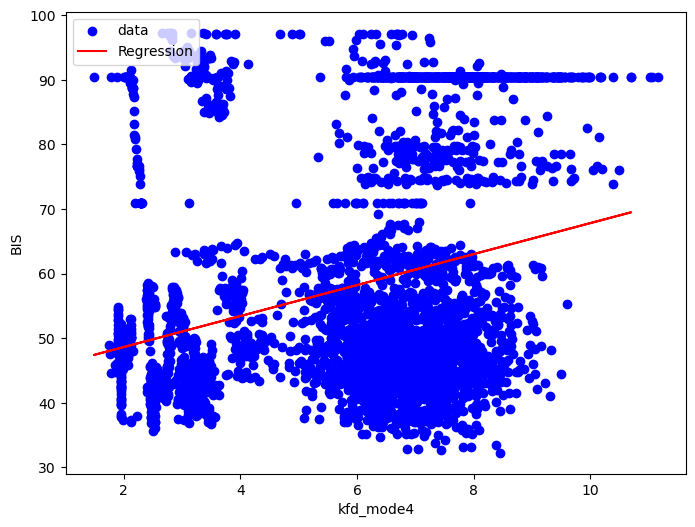

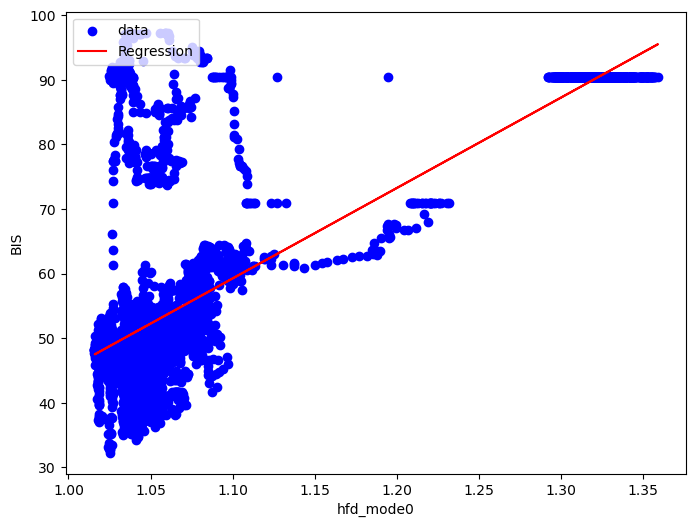

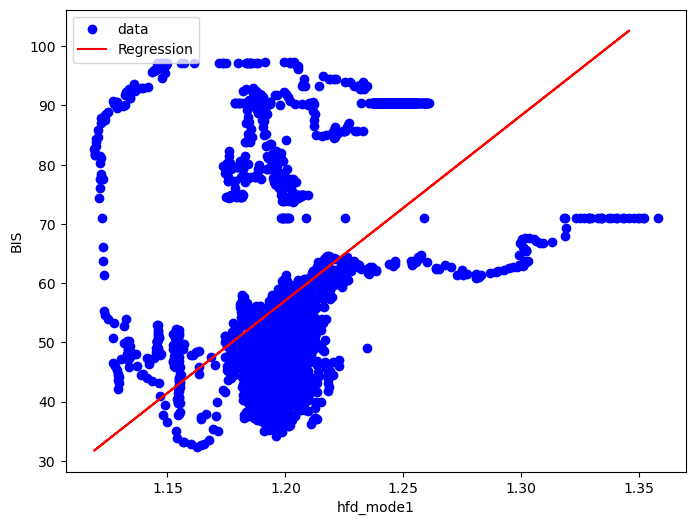

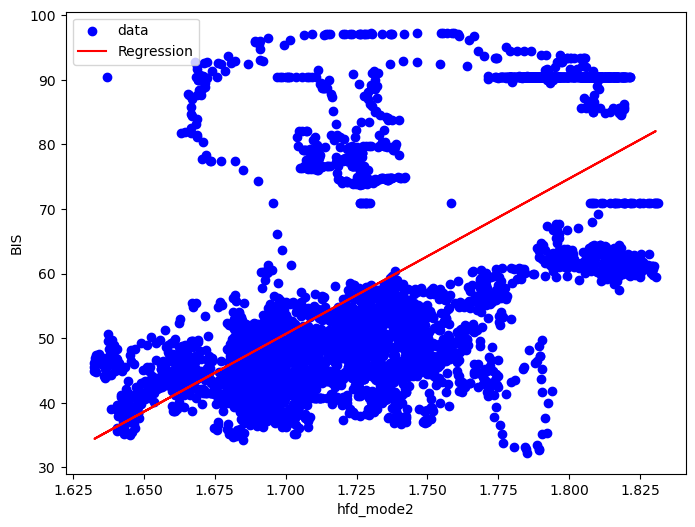

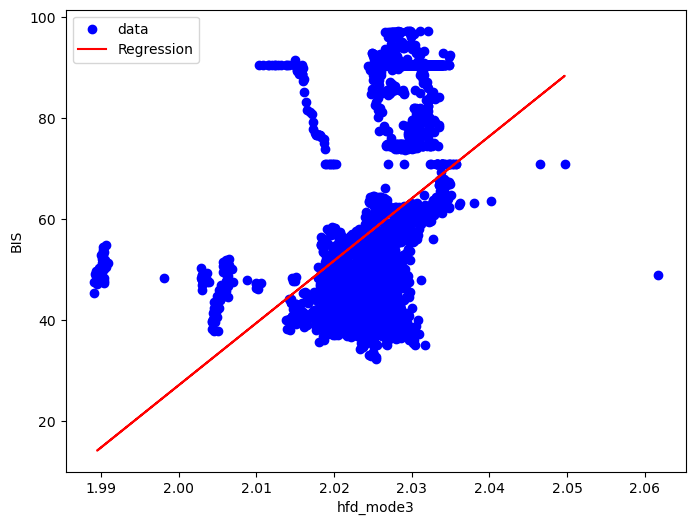

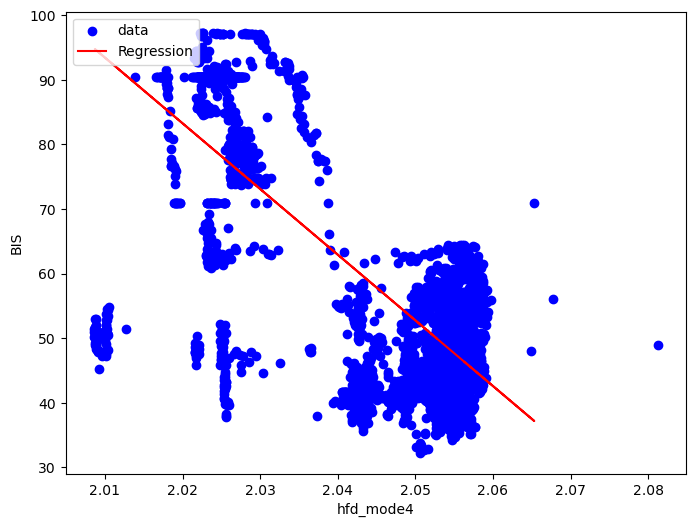

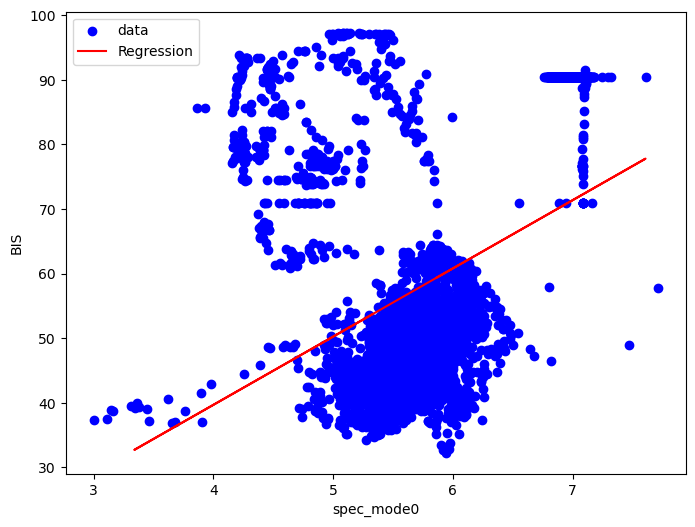

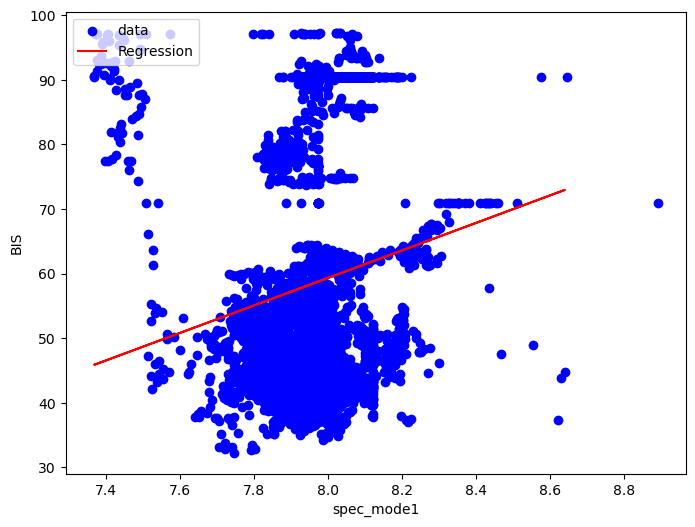

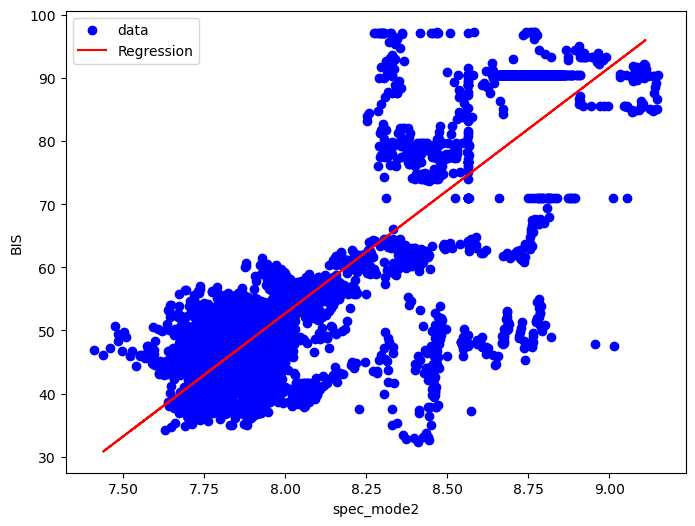

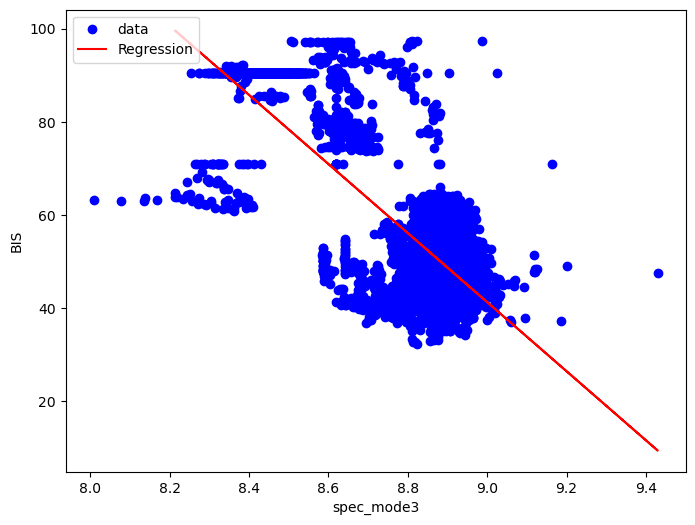

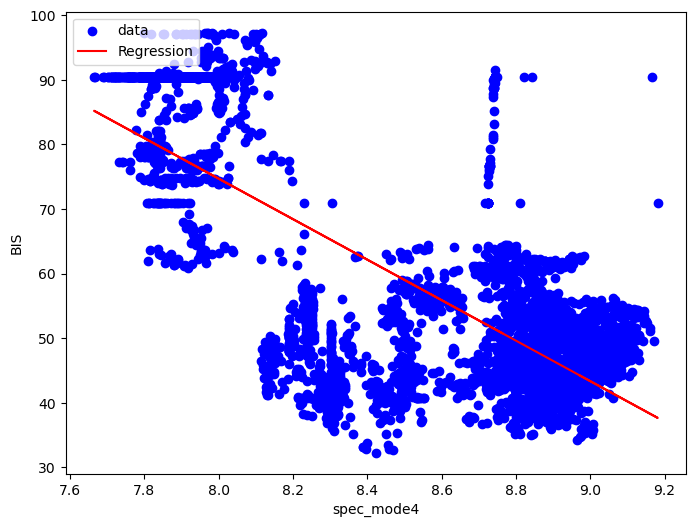

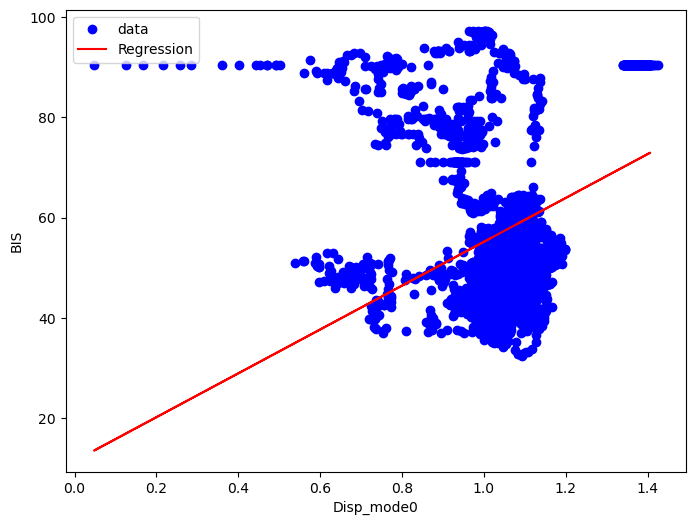

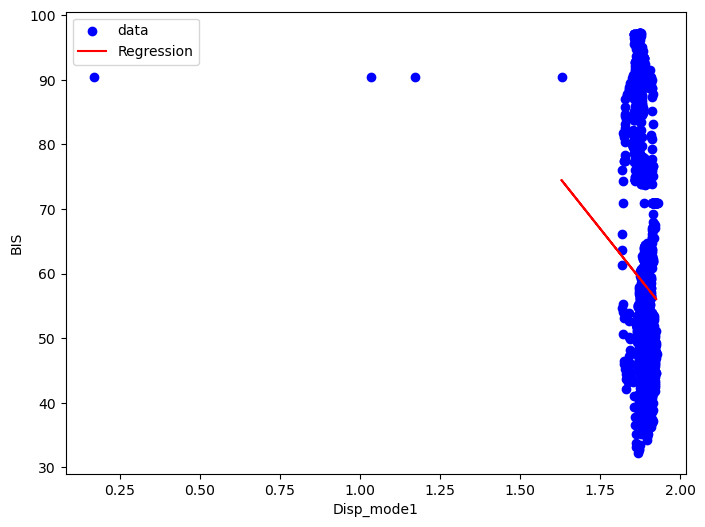

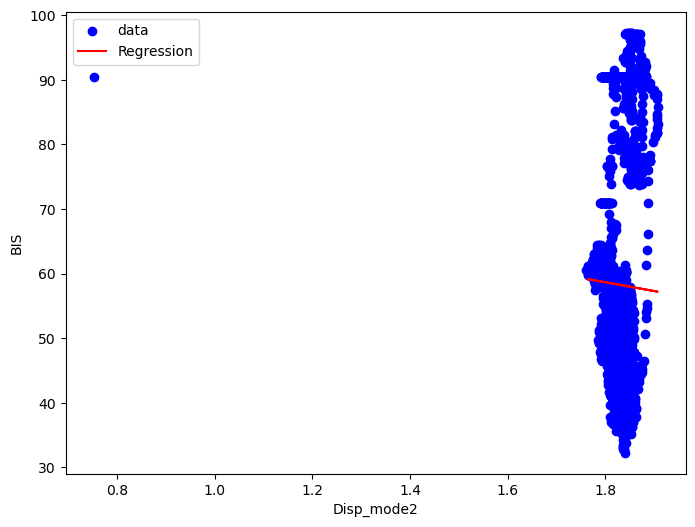

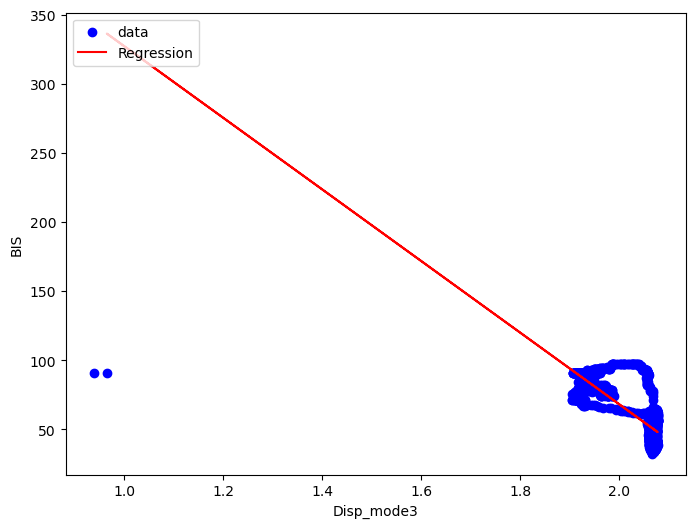

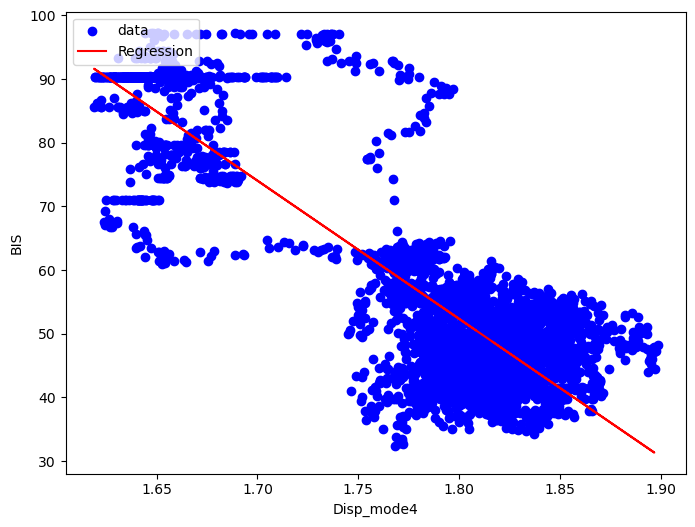

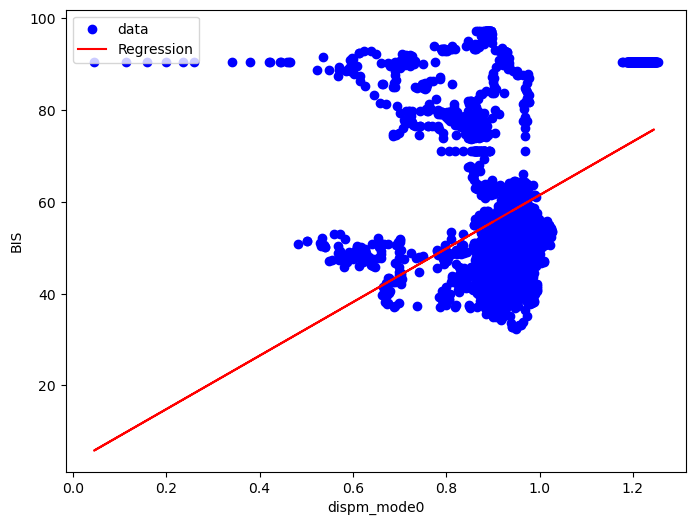

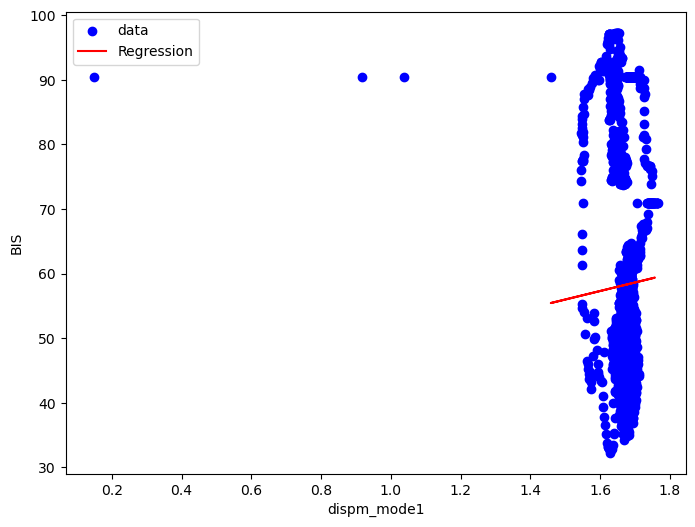

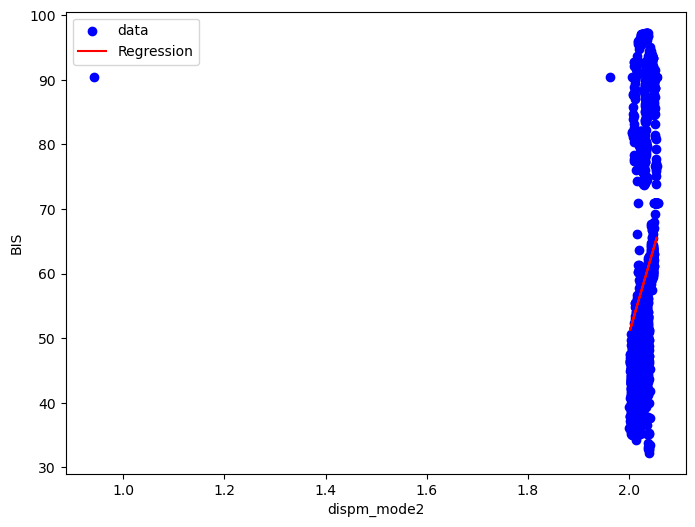

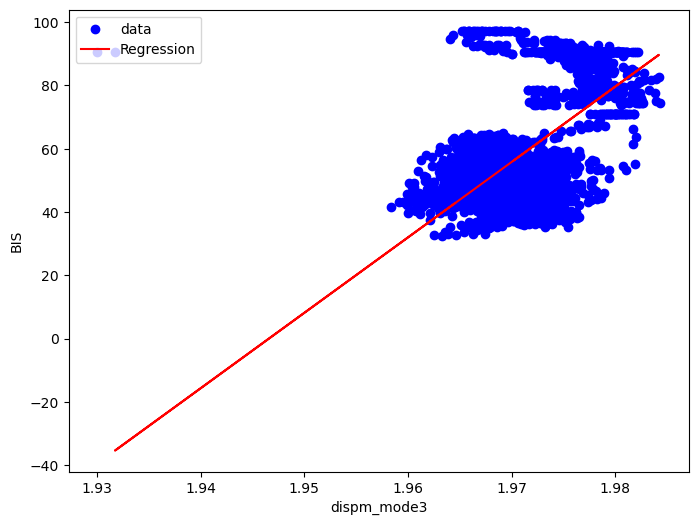

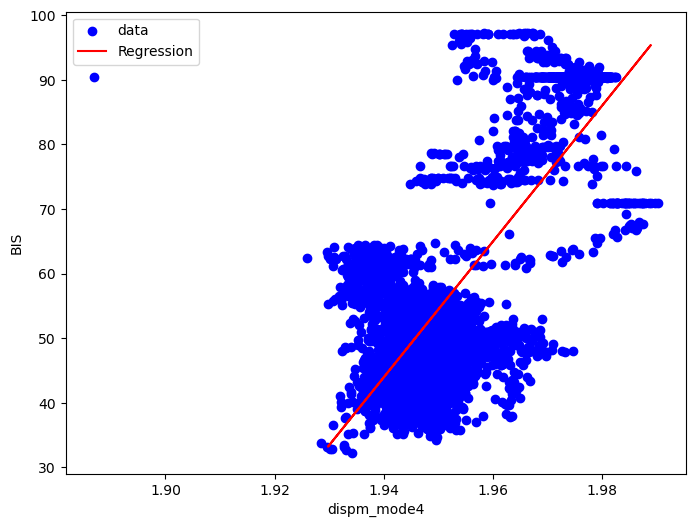

In [6]:

for column in patient_78.columns:
    if column == "BIS":
        continue
        
    plot_regression(patient_78, column)
    


In [7]:
# Metrics
total=pd.DataFrame({"Metrics": [key for key in metrics.keys()], "Values": [value*100 for value in metrics.values()]})

In [8]:
sort_total=total.sort_values('Values', ascending=False)
sort_total

,Metrics,Values
19,Perment_mode4_r2,84.249213
22,pet_mode2_r2,81.091265
17,Perment_mode2_r2,81.062725
23,pet_mode3_r2,80.929309
18,Perment_mode3_r2,80.211539
24,pet_mode4_r2,77.847107
54,Disp_mode4_r2,76.567758
32,svd_mode2_r2,75.430328
27,lzc_mode2_r2,72.593627
12,hc_mode2_r2,70.598108


### Radom forest feature selection

In [9]:


# Create a Random Forest Regressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train_scaled, y_train)

# Get feature importances
feature_importances = rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importances_df = pd.DataFrame({'feature': X.columns, 'importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='importance', ascending=False)

# Display the feature importances
print(feature_importances_df)

# Select the top k features (e.g., top 10 features)
k = 10
selected_features = feature_importances_df.head(k)['feature'].tolist()

# Use only the selected features for further analysis or modeling
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]


          feature  importance
19  Perment_mode4    0.650621
24      pet_mode4    0.206201
27      lzc_mode2    0.026411
15  Perment_mode0    0.026183
8        hm_mode3    0.011084
20      pet_mode0    0.010031
40      hfd_mode0    0.006936
12       hc_mode2    0.005306
58    dispm_mode3    0.005000
42      hfd_mode2    0.004022
30      svd_mode0    0.003925
0      detf_mode0    0.003810
53     Disp_mode3    0.003145
7        hm_mode2    0.002708
28      lzc_mode3    0.002129
25      lzc_mode0    0.002087
59    dispm_mode4    0.001711
57    dispm_mode2    0.001328
10       hc_mode0    0.001311
34      svd_mode4    0.001269
33      svd_mode3    0.001245
47     spec_mode2    0.001093
51     Disp_mode1    0.000991
54     Disp_mode4    0.000945
5        hm_mode0    0.000938
45     spec_mode0    0.000902
44      hfd_mode4    0.000896
56    dispm_mode1    0.000875
32      svd_mode2    0.000853
21      pet_mode1    0.000838
52     Disp_mode2    0.000810
43      hfd_mode3    0.000768
26      lz